In [1]:
from pandas import *

In [2]:
df=read_csv("data.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df.drop('id',axis=1,inplace=True)

In [4]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   159571 non-null  object
 1   toxic          159571 non-null  int64 
 2   severe_toxic   159571 non-null  int64 
 3   obscene        159571 non-null  int64 
 4   threat         159571 non-null  int64 
 5   insult         159571 non-null  int64 
 6   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

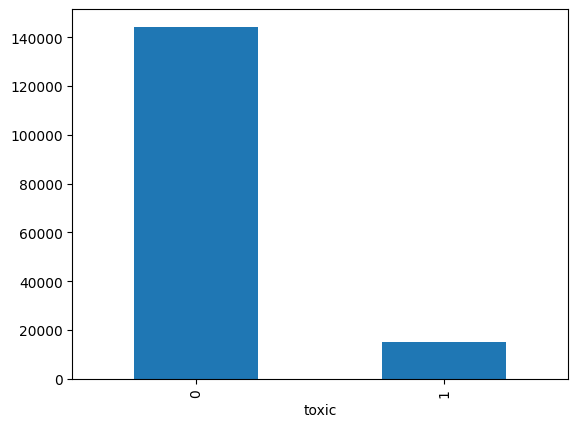

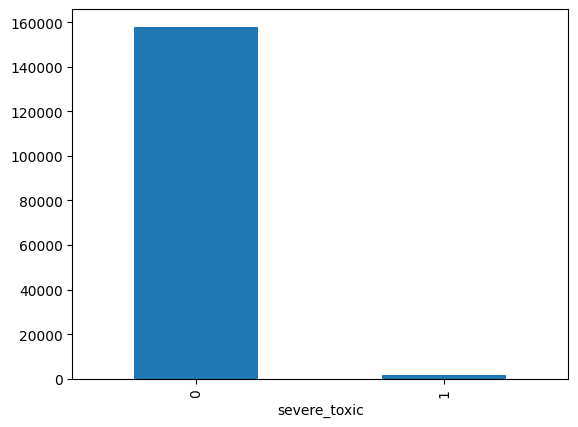

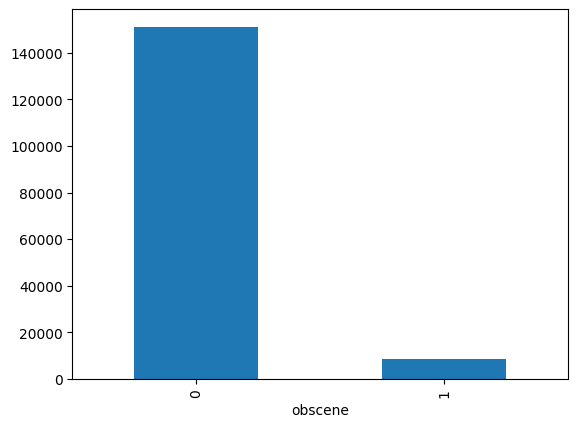

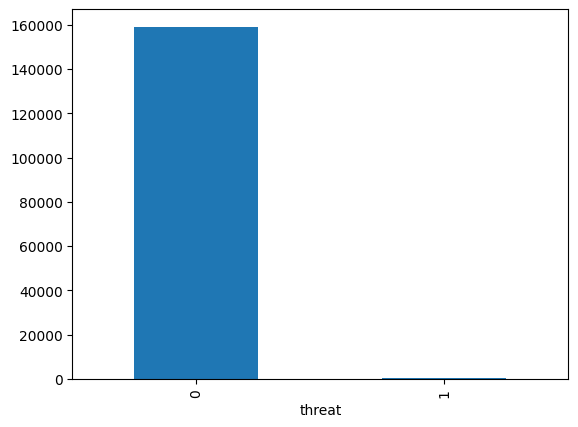

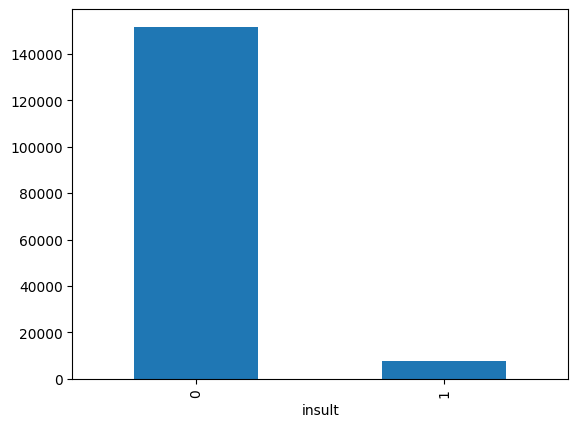

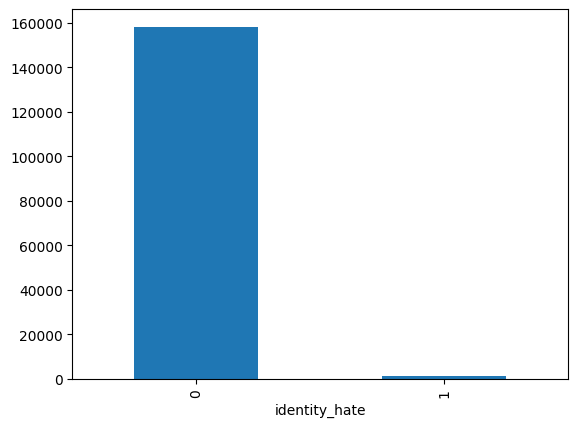

In [14]:
for column in df.columns[1:]:
    df[column].value_counts().plot(kind='bar')
    plt.show()

In [12]:
df.columns

Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [59]:
text=df.cleaned[0]

In [ ]:
# text cleaning using re

In [ ]:
import re

In [60]:
text=re.sub("[^\w \\']"," ",text)
text=re.sub(" +"," ",text)

In [61]:
text

"Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They weren't vandalisms just closure on some GAs after I voted at New York Dolls FAC And please don't remove the template from the talk page since I'm retired now 89 205 38 27"

In [32]:
def clean(text):
    text=re.sub("[^\w \\']"," ",text)
    text=re.sub(" +"," ",text)
    return text

In [33]:
df['cleaned']=df.comment_text.apply(clean)

In [34]:
df.shape

(159571, 8)

In [35]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D'aww He matches this background colour I'm se...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man I'm really not trying to edit war It's...
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More I can't make any real suggestions on imp...
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir are my hero Any chance you remember wh...


In [36]:
# lemmatize using spacy

In [37]:
import spacy

In [38]:
nlp=spacy.load("en_core_web_lg")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   159571 non-null  object
 1   toxic          159571 non-null  int64 
 2   severe_toxic   159571 non-null  int64 
 3   obscene        159571 non-null  int64 
 4   threat         159571 non-null  int64 
 5   insult         159571 non-null  int64 
 6   identity_hate  159571 non-null  int64 
 7   cleaned        159571 non-null  object
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [41]:
df.drop("comment_text",axis=1,inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   toxic          159571 non-null  int64 
 1   severe_toxic   159571 non-null  int64 
 2   obscene        159571 non-null  int64 
 3   threat         159571 non-null  int64 
 4   insult         159571 non-null  int64 
 5   identity_hate  159571 non-null  int64 
 6   cleaned        159571 non-null  object
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [65]:

doc=nlp(text)

In [66]:
# lemmatize and remove stop words
nlp(" ".join([token.lemma_ for token in doc ])).vector

array([-1.91699827e+00,  6.82387471e-01, -1.56625843e+00, -5.73402196e-02,
        1.88620472e+00,  7.79401302e-01,  4.52513784e-01,  4.13966894e+00,
       -1.06636393e+00,  1.26202440e+00,  3.62532115e+00,  1.80189514e+00,
       -3.08635426e+00,  1.86183885e-01,  1.51312971e+00,  1.04531252e+00,
        1.09632897e+00, -1.86073697e+00, -2.72874475e+00, -1.08491373e+00,
        1.70640683e+00, -1.14680719e+00, -6.13429010e-01, -1.07731640e+00,
       -1.05775106e+00, -2.90236831e-01, -2.40077043e+00, -7.96029210e-01,
       -2.08269930e+00,  7.13897109e-01,  1.01299131e+00,  2.90467739e-01,
       -1.82091045e+00,  3.62945162e-02, -1.11321056e+00, -1.01923490e+00,
       -1.52512515e+00,  9.43651378e-01,  1.70790029e+00,  1.02673054e+00,
       -7.26520002e-01,  1.19443190e+00,  1.48779258e-01,  5.50696850e-01,
       -5.18982530e-01,  1.29324615e+00,  1.52303982e+00, -3.23704076e+00,
       -2.29536667e-01,  1.27469027e+00, -1.87527500e-02,  1.54041386e+00,
       -1.21542239e+00, -

In [58]:
df.cleaned[0]

"Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They weren't vandalisms just closure on some GAs after I voted at New York Dolls FAC And please don't remove the template from the talk page since I'm retired now 89 205 38 27"

In [67]:
df_vector=DataFrame(columns=['vector'])

In [68]:
def preprocess(text):
    doc=nlp(text)
    return nlp(" ".join([token.lemma_ for token in doc ])).vector

In [71]:
df_sampled=df.sample(50000)

In [73]:
df_vector['vector']=df_sampled.cleaned.apply(preprocess)

In [74]:
df_vector.head(2)

,vector
97534,"[-3.1441917, 0.39758483, -1.0660793, 0.4546657..."
76122,"[-1.3674494, 0.4730543, -1.1252295, 0.34480712..."


In [72]:
df_sampled.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned
97534,0,0,0,0,0,0,That is correct Many even most of the Tibetan ...
76122,0,0,0,0,0,0,User friendly I propose we add the following ...
73226,0,0,0,0,0,0,Question What does indefinite block mean Plea...
37309,0,0,0,0,0,0,'''''' i disagree with your statement many je...
125941,0,0,0,0,0,0,Addendum Changed definition of 'palpitations'...


In [77]:
type(df_vector.vector[97534])

numpy.ndarray

In [78]:
# now we prepare models

In [80]:
df_vector.shape

(50000, 1)

In [82]:
y=df_sampled.drop('cleaned',axis=1)

In [84]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test =train_test_split(np.stack(df_vector.vector.values),y,test_size=0.15)

In [109]:
X_train.shape,X_test.shape

((42500, 300), (7500, 300))

In [91]:
import tensorflow as tf
from tensorflow import keras

In [104]:
import numpy as np

In [133]:
np.stack(df_vector.vector.values).reshape(1,-1,1)[0]

array([[-3.1441917 ],
       [ 0.39758483],
       [-1.0660793 ],
       ...,
       [-0.562633  ],
       [-0.5330911 ],
       [ 0.64155686]], dtype=float32)

In [140]:
np.stack(df_vector.vector.values).reshape(1,-1,1)[0].shape

(15000000, 1)

In [144]:
model=keras.Sequential()
model.add(keras.layers.LSTM(64,input_shape=(None,1)))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(6,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [145]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                16896     
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 6)                 198       
                                                                 
Total params: 23334 (91.15 KB)
Trainable params: 23334 (91.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [127]:
model.build(input_shape=(1,300,1))

In [146]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1329/1329 [==============================] - 188s 137ms/step - loss: 0.1299 - accuracy: 0.9668
Epoch 2/5
  13/1329 [..............................] - ETA: 2:59 - loss: 0.1173 - accuracy: 0.9904

KeyboardInterrupt: 

In [143]:
del model

In [147]:
model.evaluate(X_test,y_test)

235/235 [==============================] - 15s 58ms/step - loss: 0.1164 - accuracy: 0.9936


[0.11643996834754944, 0.9936000108718872]

In [159]:
text='You freaking suck! I am going to kill you. i will hit u onur head badly till  die'

In [160]:
vector=preprocess(clean(text))

In [164]:
model.predict(np.expand_dims(vector,0))[0]

1/1 [==============================] - 0s 30ms/step


array([0.51453453, 0.14740281, 0.4074068 , 0.03404564, 0.34716114,
       0.06717859], dtype=float32)

In [163]:
labels=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [186]:
def predict(text):
    vector=preprocess(clean(text))
    result=np.round(model.predict(np.expand_dims(vector,0))[0]*100,1)
    labels=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    zipped=dict(zip(labels,result))
    result=""
    for key,value in zipped.items():
        result+=f"{key}=>{value}\n"
    return result

In [187]:
predict('You freaking suck! I am going to kill you. i will hit u onur head badly till  die')

1/1 [==============================] - 0s 36ms/step


'toxic=>51.5\nsevere_toxic=>14.699999809265137\nobscene=>40.70000076293945\nthreat=>3.4000000953674316\ninsult=>34.70000076293945\nidentity_hate=>6.699999809265137\n'

In [195]:
import gradio as gr

ImportError: cannot import name 'RootModel' from 'pydantic' (C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydantic\__init__.cp311-win_amd64.pyd)

In [191]:
model.save("toxicity.keras")

In [194]:
!pip install jinja2